In [1]:
import os, pandas as pd, numpy as np

In [2]:
df=pd.read_csv("/content/NSSO68 (3).csv",encoding="Latin-1", low_memory=False)

In [3]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2.0,12.000000,154.18
1,2,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2.0,333.000000,484.95
2,3,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2.0,35.000000,214.84
3,4,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2.0,168.333333,302.30
4,5,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2.0,15.000000,148.00


In [87]:
WB = df[df["state"]==21]

In [23]:
WB.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
741,742,4.110000e+31,1,41110,68,10,1,2,21,213,...,0.005,0.003,0.0,10.008000,884.12550,33.110413,ORI,3.0,19.750000,164.840000
742,743,4.110000e+31,1,41110,68,10,1,2,21,213,...,0.000,0.000,0.0,33.333333,766.90300,31.683645,ORI,3.0,71.333333,183.746667
743,744,4.110000e+31,1,41110,68,10,1,2,21,213,...,0.000,0.000,0.0,50.000000,661.92925,25.575244,ORI,3.0,78.500000,167.310000
744,745,4.110000e+31,1,41110,68,10,1,2,21,213,...,0.000,0.000,0.0,6.000000,415.24180,24.920166,ORI,3.0,0.000000,83.624000
745,746,4.110000e+31,1,41110,68,10,1,2,21,213,...,0.000,0.000,0.0,7.500000,406.91700,24.742780,ORI,3.0,0.000000,120.522500


In [24]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [58]:
WB_new = WB[['state', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [59]:
WB_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       18
state                0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [60]:
WB_clean = WB_new.copy()

In [61]:
WB_clean.loc[:, 'Meals_At_Home'] = WB_clean['Meals_At_Home'].fillna(WB_new['Meals_At_Home'].mean())

In [62]:
WB_clean.isnull().any()

state               False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [63]:
# Outlier Checking

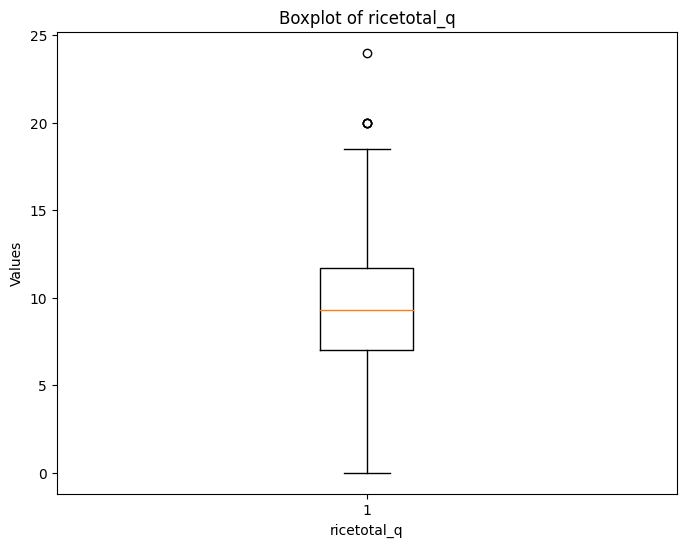

In [64]:
import matplotlib.pyplot as plt
# Assuming WB_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(WB_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [65]:
rice1 = WB_clean['ricetotal_q'].quantile(0.25)
rice2 = WB_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [66]:
WB_clean=WB_new[(WB_new['ricetotal_q']<=up_limit)&(WB_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7893c55bf580>,
 'caps': [<matplotlib.lines.Line2D at 0x7893c55bfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7893c55bcd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7893c55bd720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7893c55bc550>],
 'means': []}

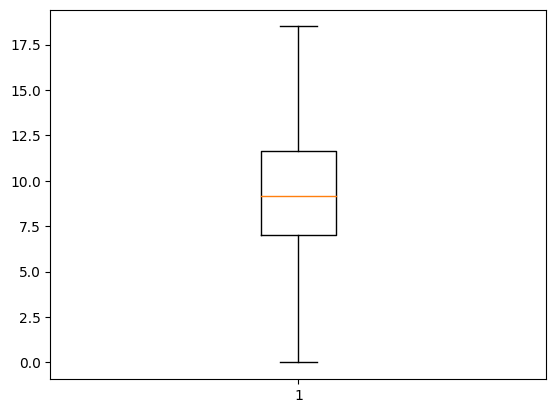

In [67]:
plt.boxplot(WB_clean['ricetotal_q'])

In [68]:
WB_clean['District'].unique()

array([ 4, 29, 30,  3, 28,  2,  1, 27,  5, 26, 25, 24, 23, 22, 20, 16, 17,
       19, 15, 18, 14, 21, 13, 12,  7,  8, 11,  6, 10,  9])

In [69]:
# Replace values in the 'Sector' column
WB_clean.loc[:,'Sector'] = WB_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [70]:
#total consumption

In [71]:
WB_clean.columns

Index(['state', 'District', 'Sector', 'Region', 'State_Region', 'ricetotal_q',
       'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q',
       'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [72]:
WB_clean.loc[:, 'total_consumption'] = WB_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

<ipython-input-72-c3c87b7a75c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WB_clean.loc[:, 'total_consumption'] = WB_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [73]:
WB_clean.head()

,state,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
741,21,4,RURAL,3.0,213,8.500000,2.5,0.250000,0,0.000000,0.000,33.110413,10.008000,60.0,54.368413
742,21,4,RURAL,3.0,213,4.666667,5.0,0.333333,0,0.333333,0.200,31.683645,33.333333,60.0,75.550312
743,21,4,RURAL,3.0,213,4.500000,4.5,0.500000,0,0.000000,0.000,25.575244,50.000000,60.0,85.075244
744,21,4,RURAL,3.0,213,13.000000,1.0,0.200000,0,0.200000,0.000,24.920166,6.000000,60.0,45.320166
745,21,4,RURAL,3.0,213,12.500000,0.0,0.250000,0,0.000000,0.025,24.742780,7.500000,90.0,45.017780


In [74]:
WB_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                 
                     std       mean         max       min
Region                                                   
1.0            32.414973  62.180210  187.751465  24.98023
2.0            24.954397  49.355884  211.533867   0.00000
3.0            38.631152  58.955174  299.438431   0.00000

In [75]:
WB_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                51.280868  57.415027  299.438431  21.540365
2                41.960684  59.031612  175.250420   0.000000
3                34.527237  62.380691  164.275465  25.250133
4                25.610555  57.201858  149.033748  30.150168
5                42.086408  62.120997  220.017100   0.000000
6                 7.718583  53.410550   60.775245  43.325229
7                17.518657  21.592086   47.450250   0.000000
8                 3.541844  51.322875   56.040408  45.867025
9                33.720246  61.566050  134.370770  31.875225
10               28.182754  61.607701  118.383833  31.800186
11               15.522049  53.383713   79.000597  37.000000
12               16.914891  52.327427   99.478696  24.980230
13               13.716476  65.201879   81.582334  38.186073
14               29.245448  69.828054  115.309683  37.300030
15               13.782658  65.406585   87.301300  43.500242
16               39.193320  79.661913  148.375605  44.100280
17               48.389512  69.546444  166.577167  29.162638
18               50.571888  67.490440  187.751465  31.425362
19               13.559877  44.205419   77.100260  37.441812
20                6.977840  50.383126   58.843975  37.150435
21               22.442370  55.097293  120.317673  30.509182
22                6.716927  44.849968   58.181376  33.626147
23               18.853561  49.862959   99.525362  22.882440
24               19.659886  48.303110  109.366877  20.000000
25               25.234735  57.527052  117.000390  25.816865
26               34.216146  56.553452  211.533867  29.700140
27               12.785232  42.259938   89.025444  24.250167
28               25.991377  56.331454  137.796162  22.550402
29               29.907043  36.516684  108.013260   0.000000
30               32.444519  47.905478  155.925806   0.000000

In [76]:
total_consumption_by_districtcode=WB_clean.groupby('District')['total_consumption'].sum()

In [77]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
5    3975.743824
3    1933.801424
2    1889.011584
Name: total_consumption, dtype: float64

In [78]:
WB_clean.loc[:,"District"] = WB_clean.loc[:,"District"].replace({5: "Hyderabad and Rangar", 6: "Rangareddi", 23: "Chittoor"})

In [79]:
total_consumption_by_districtname=WB_clean.groupby('District')['total_consumption'].sum()

In [80]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Hyderabad and Rangar    3975.743824
3                       1933.801424
2                       1889.011584
Name: total_consumption, dtype: float64

In [81]:
from statsmodels.stats import weightstats as stests

In [82]:
rural=WB_clean[WB_clean['Sector']=="RURAL"]
urban=WB_clean[WB_clean['Sector']=="URBAN"]

In [83]:
rural.head()

,state,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
741,21,4,RURAL,3.0,213,8.500000,2.5,0.250000,0,0.000000,0.000,33.110413,10.008000,60.0,54.368413
742,21,4,RURAL,3.0,213,4.666667,5.0,0.333333,0,0.333333,0.200,31.683645,33.333333,60.0,75.550312
743,21,4,RURAL,3.0,213,4.500000,4.5,0.500000,0,0.000000,0.000,25.575244,50.000000,60.0,85.075244
744,21,4,RURAL,3.0,213,13.000000,1.0,0.200000,0,0.200000,0.000,24.920166,6.000000,60.0,45.320166
745,21,4,RURAL,3.0,213,12.500000,0.0,0.250000,0,0.000000,0.025,24.742780,7.500000,90.0,45.017780


In [84]:
urban.head()

,state,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption


In [85]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [86]:
if cons_rural.empty or cons_urban.empty:
    print("Warning: One or both of the consumption Series are empty. Z-test cannot be performed.")
else:
    z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
    # Print the z-score and p-value
    print("Z-Score:", z_statistic)
    print("P-Value:", p_value)